# The Medical Costs case study for section 1

Prerequisite chapters: 2-4

Scenario

You are an analyst employed by a health care company. Your boss has asked you to produce a report that answers the following questions about medical insurance charges.

Instructions

1. Create a Notebook for the study, name the Notebook first_last_medical_costs where first_last specifies your first and last name.
2. Complete the tasks listed
3. Create a heading for the question.
4. Create a table or plot that answers the question and use a heading or raw text to summarize what the table or plot tells you.
5. Repeat steps 2-4 for each question.

Tasks

1. Read the data from the CSV file into a DataFrame (2 pts.).
2. Display the first five rows of data (2 pts.).
3. Display information about each of the columns (2 pts.).
4. Display the number of unique values in each column (2 pts.).

Questions

1. How is age related to medical costs (5 pts.)?
2. How is number of children related to medical costs (5 pts.)?
3. How is the number of people distributed by region (5 pts.)?
4. How is the number of people distributed by age (5 pts.)?
5. How are the charges distributed (5 pts.)?

Note

    If you encounter warnings or errors as you work on this case study, search the Internet for a solution to the problem and implement it.

After completing the assignment, please submit your .ipynb file.

# The Medical Costs case study for section 2

Prerequisite chapters: 2-8

Scenario

Your boss liked your previous report so much that he wants you to expand on it by completing the following tasks and answering the following questions.

Tasks and questions

1. Bin the bmi column. To do that, search the Internet to determine how you should bin and label the data (5 pts.).
2. How are the charges related to the bmi (5 pts.)?
3. How is the smoker status related to the charges (5 pts.)?
4. How are the charges related to the region (5 pts.)?
5. Which region has the highest obesity percentage (5 pts.)?

Instructions

Add heading and code cells to the Notebook that you created for section 1 so that it completes the tasks and answers the questions shown above.

After completing the assignment, please submit your .ipynb file.


## The Medical Costs case study for section 3

Scenario

Once again, your boss wants you to expand on your previous report by completing the following tasks and answering the following questions.

Tasks and questions

1. Create a simple regression to show the relationship between charges and age (10 pts.).
2. How does this relationship change with smoking status (10 pts.)?
3. How does this relationship change with BMI (10 pts.)?

The following 3 tasks and questions are EXTRA CREDIT

1. Create a multiple regression model to predict charges. To do that, you’ll need to dummy encode and rescale the data (10 pts.).
2. Make predictions with your multiple regression model and evaluate how well your model is working (10 pts.).
3. What is the optimal number of parameters for the multiple regression (10 pts.)?

Instructions

Add heading and code cells to the Notebook that you created for section 2 so that it answers the questions shown above.

After completing the assignment, please submit your .ipynb file.

## The Medical Costs case study for section 1

Prerequisite chapters: 2-4

Scenario

You are an analyst employed by a health care company. Your boss has asked you to produce a report that answers the following questions about medical insurance charges.

Instructions

1. Create a Notebook for the study, name the Notebook first_last_medical_costs where first_last specifies your first and last name.
2. Complete the tasks listed
3. Create a heading for the question.
4. Create a table or plot that answers the question and use a heading or raw text to summarize what the table or plot tells you.
5. Repeat steps 2-4 for each question.


## Import all required modules

In [1]:
# Import pandas and assign the alias pd
import pandas as pd

# Import Seaborn and assign the alias sns
import seaborn as sns

# Import the Scikit-learn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import additional SciKit-learn class
from sklearn.preprocessing import StandardScaler

# Import additional SciKit-learn classes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Import mathplotlib.pyplot and assign the alias plt

import matplotlib.pyplot as plt


## Tasks for Section 1 of the Medical Costs case study.

In [2]:
# 1. Read the data from the CSV file into a DataFrame.

cost_data = pd.read_csv('insurance.csv')


In [3]:
# 2. Display the first five rows of data.

cost_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 3. Display information about each of the columns.

cost_data.info(memory_usage = 'deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 286.5 KB


In [5]:
# 4. Display the number of unique values in each column.

cost_data.nunique()


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
# Renamed the charges column to cost and then display the first five lines.

cost_data.rename(columns = {'charges':'cost'}, inplace = True)

cost_data.head()


,age,sex,bmi,children,smoker,region,cost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Change the region column data to titlecase and display the first five lines. 

cost_data.region = cost_data.apply(lambda x: x.region.title(), axis = 1)

cost_data.head()


,age,sex,bmi,children,smoker,region,cost
0,19,female,27.900,0,yes,Southwest,16884.92400
1,18,male,33.770,1,no,Southeast,1725.55230
2,28,male,33.000,3,no,Southeast,4449.46200
3,33,male,22.705,0,no,Northwest,21984.47061
4,32,male,28.880,0,no,Northwest,3866.85520


## Questions for Section 1 of the Medical Costs case study.

1. How is age related to medical costs (5 pts.)?
2. How is number of children related to medical costs (5 pts.)?
3. How is the number of people distributed by region (5 pts.)?
4. How is the number of people distributed by age (5 pts.)?
5. How are the charges distributed (5 pts.)?

In [8]:
# Question 1. How is age related to medical costs?

In [9]:
# Determine the average cost by age, using the groupby() method.

cost_by_age = cost_data.groupby(['age']).cost.mean()

cost_by_age = cost_by_age.reset_index().sort_values('cost', ascending = False)

cost_by_age.head()


,age,cost
46,64,23275.530837
43,61,22024.457609
42,60,21979.418507
45,63,19884.998461
25,43,19267.278653


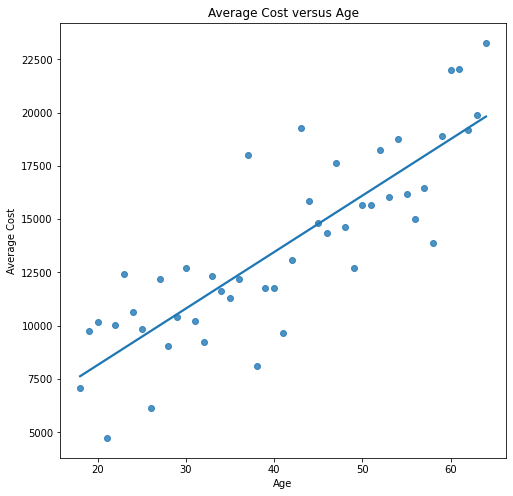

In [10]:
# Plot the relationship between age and medical costs.

# Found a method to increase the plot size, while researching on the internet on the following
#   site: https://www.geeksforgeeks.org/how-to-set-a-seaborn-chart-figure-size/
#   I had to import import matplotlib.pyplot as plt to make this code work.

fig, ax = plt.subplots(figsize=(8, 8))

ax = sns.regplot(data = cost_by_age, x = 'age', y = 'cost', ci = None)

ax.set(title = 'Average Cost versus Age', xlabel = 'Age', ylabel = 'Average Cost');


In [11]:
# Question 2. How is number of children related to medical costs?

In [12]:
# Examine the number and range of the children column.

cost_data.children.value_counts()


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [13]:
# Determine the average cost by the number of children, using the groupby() method.

cost_by_child = cost_data.groupby(['children']).cost.mean()

cost_by_child = cost_by_child.reset_index().sort_values('cost', ascending = False)

cost_by_child.head(10)


,children,cost
3,3,15355.318367
2,2,15073.563734
4,4,13850.656311
1,1,12731.171832
0,0,12365.975602
5,5,8786.035247


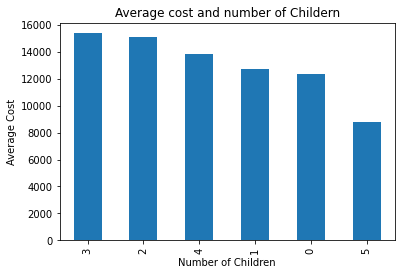

In [14]:
cost_by_child.plot(x = 'children', y = 'cost', kind = 'bar', 
                   title = 'Average cost and number of Childern',
                  xlabel = 'Number of Children',
                  ylabel = 'Average Cost', legend = None);


In [15]:
# Question 3. How is the number of people distributed by region?

In [16]:
# Find the number of people in each family.

cost_data['familySize'] = cost_data.children + 1

cost_data.head()


,age,sex,bmi,children,smoker,region,cost,familySize
0,19,female,27.900,0,yes,Southwest,16884.92400,1
1,18,male,33.770,1,no,Southeast,1725.55230,2
2,28,male,33.000,3,no,Southeast,4449.46200,4
3,33,male,22.705,0,no,Northwest,21984.47061,1
4,32,male,28.880,0,no,Northwest,3866.85520,1


In [17]:
# Find the total number of people by region using the groupby() method.

family_by_region = cost_data.groupby('region').familySize.sum()

family_by_region = family_by_region.reset_index().sort_values('familySize', ascending = False)

family_by_region.head()


,region,familySize
2,Southeast,746
1,Northwest,698
3,Southwest,696
0,Northeast,663


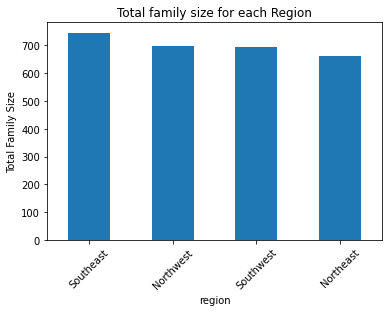

In [18]:
# Plot the results of summing the familySize vs. region.

family_by_region.plot(x = 'region', y = 'familySize', kind = 'bar',
                     title = 'Total family size for each Region',
                     ylabel = 'Total Family Size', rot = 45, legend = None);


In [19]:
# Question 4. How is the number of people distributed by age?

In [20]:
# Use the describe() method to gather and show the data distribution of the age column.

cost_data.age.describe()


count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [21]:
# Use various statistical tools to print the data distribution of the age column.

print(f'\nThe Youngest age listed is {cost_data.age.min()} years.\n')

print(f'The mean (or Average) age is {cost_data.age.mean():.2f} years.\n')

print(f'The Oldest age listed is {cost_data.age.max()} years.\n')

print(f'The Standard Deviation (STD) for the age data is {cost_data.age.std():.2f} years.\n')



The Youngest age listed is 18 years.

The mean (or Average) age is 39.21 years.

The Oldest age listed is 64 years.

The Standard Deviation (STD) for the age data is 14.05 years.



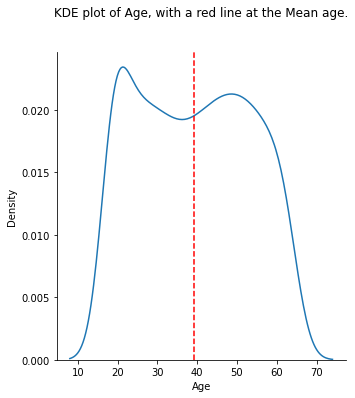

In [22]:
# Create a KDE plot of the age column and draw a line at the Mean age.

g = sns.displot(data = cost_data, x = 'age', kind = 'kde')

for ax in g.axes.flat:
    ax.axvline(cost_data.age.mean(), ls = '--', color = 'red')
    ax.set(title = 'KDE plot of Age, with a red line at the Mean age.\n\n',
          xlabel = 'Age')


In [23]:
# Question 5. How are the charges distributed (5 pts.)?

In [24]:
# Use the describe() method to gather and show the data distribution of the cost column.

cost_data.cost.describe()


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: cost, dtype: float64

In [25]:
# Use various statistical tools to print the data distribution of the cost column.

print(f'\nThe Lowest cost listed is ${cost_data.cost.min():.2f}.\n')

print(f'The mean (or Average) cost is ${cost_data.cost.mean():.2f}.\n')

print(f'The Highest cost listed is ${cost_data.cost.max():.2f}.\n')

print(f'The Standard Deviation (STD) for the cost data is ${cost_data.cost.std():.2f}.\n')



The Lowest cost listed is $1121.87.

The mean (or Average) cost is $13270.42.

The Highest cost listed is $63770.43.

The Standard Deviation (STD) for the cost data is $12110.01.



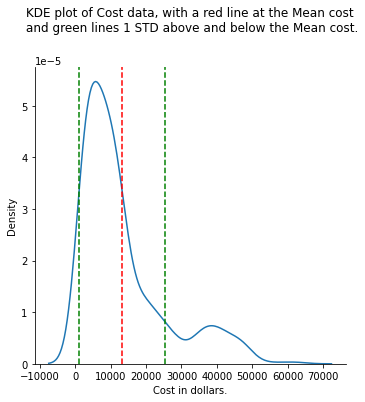

In [26]:
# Create a KDE plot of the cost column and draw a line at the Mean cost.

g = sns.displot(data = cost_data, x = 'cost', kind = 'kde')

for ax in g.axes.flat:
    
    ax.axvline(cost_data.cost.mean(), ls = '--', color = 'red')
    ax.axvline(cost_data.cost.mean() - cost_data.cost.std(), ls = '--', color = 'green')
    ax.axvline(cost_data.cost.mean() + cost_data.cost.std(), ls = '--', color = 'green') 
    
    ax.set(title = 'KDE plot of Cost data, with a red line at the Mean cost\n and green lines 1 STD above and below the Mean cost.\n\n' ,
          xlabel = 'Cost in dollars.')


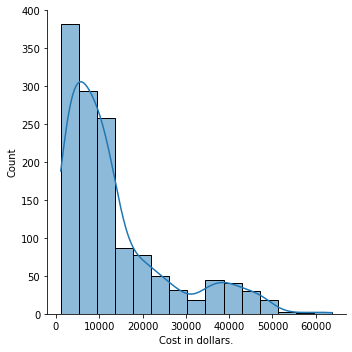

In [27]:
g = sns.displot(data = cost_data, x = 'cost', bins = 15, kde = True)

for ax in g.axes.flat:
    ax.set(xlabel = 'Cost in dollars.');
    

# The Medical Costs case study for section 2

Prerequisite chapters: 2-8

Scenario

Your boss liked your previous report so much that he wants you to expand on it by completing the following tasks and answering the following questions.


## Tasks and questions for Section 2 of the Medical Costs case study.

1. Bin the bmi column. To do that, search the Internet to determine how you should bin and label the data (5 pts.).
2. How are the charges related to the bmi (5 pts.)?
3. How is the smoker status related to the charges (5 pts.)?
4. How are the charges related to the region (5 pts.)?
5. Which region has the highest obesity percentage (5 pts.)?

In [28]:
# Task 1. Bin the bmi column. To do that, search the Internet to determine how you should bin and label the data.

In [29]:
# Display the basic bmi column data.

cost_data.bmi.head


<bound method NDFrame.head of 0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64>

In [30]:
# Use the describe() method to gather and show the data distribution of the bmi column.

cost_data.bmi.describe()


count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

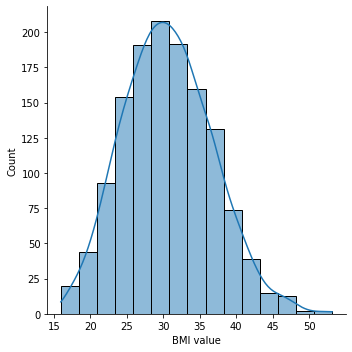

In [31]:
# Plot the bmi data to further review the data. 

# I tried serveral bin counts and 15 seemed to match the KDE curve.

g = sns.displot(data = cost_data, x = 'bmi', bins = 15, kde = True)

for ax in g.axes.flat:
    ax.set(xlabel = 'BMI value');
    

In [32]:
# Use cut(), for equal-sized bin to get a look at the data.

pd.cut(cost_data.bmi, bins = 5)


0       (23.394, 30.828]
1       (30.828, 38.262]
2       (30.828, 38.262]
3       (15.923, 23.394]
4       (23.394, 30.828]
              ...       
1333    (30.828, 38.262]
1334    (30.828, 38.262]
1335    (30.828, 38.262]
1336    (23.394, 30.828]
1337    (23.394, 30.828]
Name: bmi, Length: 1338, dtype: category
Categories (5, interval[float64, right]): [(15.923, 23.394] < (23.394, 30.828] < (30.828, 38.262] < (38.262, 45.696] < (45.696, 53.13]]

In [33]:
# Use qcut() to get same number of bmi values in each bin, to get a look at the data.

pd.qcut(cost_data.bmi, q = 5)


0                   (25.326, 28.797]
1                    (32.032, 35.86]
2                    (32.032, 35.86]
3       (15.959000000000001, 25.326]
4                   (28.797, 32.032]
                    ...             
1333                (28.797, 32.032]
1334                (28.797, 32.032]
1335                  (35.86, 53.13]
1336                (25.326, 28.797]
1337                (28.797, 32.032]
Name: bmi, Length: 1338, dtype: category
Categories (5, interval[float64, right]): [(15.959000000000001, 25.326] < (25.326, 28.797] < (28.797, 32.032] < (32.032, 35.86] < (35.86, 53.13]]

In [34]:
# Use cut(), to create bins and labels. Then add a bmiBins column and list the first five rows.

cost_data['bmiBins'] = pd.cut(cost_data.bmi, bins = [0, 16.5, 18.5, 25, 30, 55],
      labels = ['Severly underweight', 'Underweight', 'Normal Weight', 'Overweight', 'Obese'])

cost_data.head()


,age,sex,bmi,children,smoker,region,cost,familySize,bmiBins
0,19,female,27.900,0,yes,Southwest,16884.92400,1,Overweight
1,18,male,33.770,1,no,Southeast,1725.55230,2,Obese
2,28,male,33.000,3,no,Southeast,4449.46200,4,Obese
3,33,male,22.705,0,no,Northwest,21984.47061,1,Normal Weight
4,32,male,28.880,0,no,Northwest,3866.85520,1,Overweight


In [35]:
# Now to show the breakdown by the bmi bins.

cost_data.bmiBins.value_counts()


Obese                  705
Overweight             386
Normal Weight          226
Underweight             20
Severly underweight      1
Name: bmiBins, dtype: int64

In [36]:
# Question 2. How are the charges related to the bmi?

In [37]:
# Determine the average cost by bmiBins, using the groupby() method.

cost_by_bmi = cost_data.groupby(['bmiBins']).cost.mean()

cost_by_bmi = cost_by_bmi.reset_index().sort_values('cost', ascending = False)

cost_by_bmi.head()


,bmiBins,cost
4,Obese,15560.926321
3,Overweight,10997.803881
2,Normal Weight,10435.440719
1,Underweight,9005.761865
0,Severly underweight,1694.796400


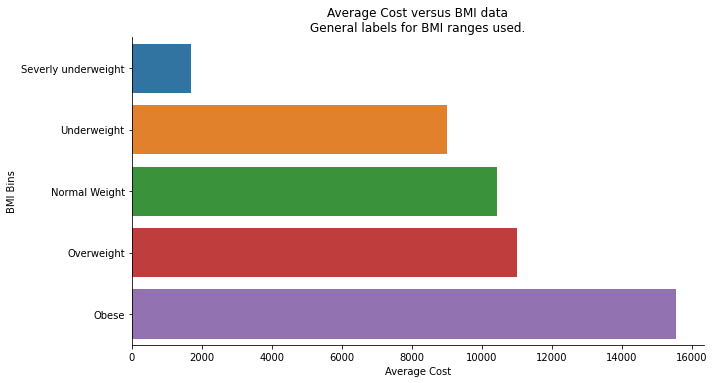

In [38]:
# Plot the relationship between bmi and medical costs.

ax = sns.catplot(data = cost_by_bmi, y = 'bmiBins', x = 'cost', kind = 'bar', aspect = 2.0)

ax.set(title = 'Average Cost versus BMI data\nGeneral labels for BMI ranges used.', ylabel = 'BMI Bins', xlabel = 'Average Cost');


In [39]:
# Question 3. How is the smoker status related to the charges?

In [40]:
# Display the basic smoker column data.

cost_data.smoker.head()


0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

In [41]:
# After reviewing the data, I am changing the yes/no to Yes/No.
#   Used the title() method.

cost_data.smoker = cost_data.smoker.str.title()


In [42]:
# Now to show the breakdown by the smoker column.

cost_data.smoker.value_counts()


No     1064
Yes     274
Name: smoker, dtype: int64

In [43]:
# Determine the average cost by smoker, using the groupby() method.

cost_by_smoker = cost_data.groupby(['smoker']).cost.mean()

cost_by_smoker = cost_by_smoker.reset_index().sort_values('cost', ascending = False)

cost_by_smoker.head()


,smoker,cost
1,Yes,32050.231832
0,No,8434.268298


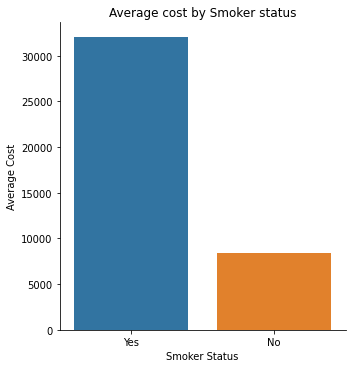

In [44]:
# Plot the data for the average cost/charge by smoker (Yes or No).

g = sns.catplot(data = cost_by_smoker, x = 'smoker', y = 'cost', kind = 'bar')

for ax in g.axes.flat:
    ax.set(title = 'Average cost by Smoker status',
          xlabel = 'Smoker Status',
          ylabel = 'Average Cost');
    

In [45]:
# Question 4. How are the charges related to the region?

In [46]:
# Find the Average cost by region using the groupby() method.

cost_data_region = cost_data.groupby('region').cost.mean()

cost_data_region = cost_data_region.reset_index().sort_values('cost', ascending = False)

cost_data_region.head()


,region,cost
2,Southeast,14735.411438
0,Northeast,13406.384516
1,Northwest,12417.575374
3,Southwest,12346.937377


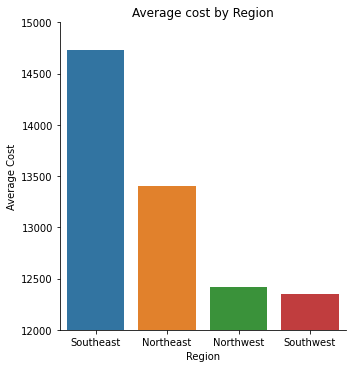

In [47]:
# Plot the data for the average cost/charge by region.

g = sns.catplot(data = cost_data_region, x = 'region', y = 'cost', kind = 'bar')

for ax in g.axes.flat:
    ax.set(title = 'Average cost by Region',
          xlabel = 'Region',
          ylabel = 'Average Cost',
          ylim = (12000,15000));
    

In [48]:
# Question 5. Which region has the highest obesity percentage?

In [49]:
# Determine the count of bmi items by region, using the groupby() method.
#    Then convert the Series to a DataFrame and rename the bmi column to bmiCount.

bmi_region_count_sr = cost_data.groupby(['region']).bmi.count()

bmi_region_count = bmi_region_count_sr.to_frame().reset_index()

bmi_region_count.rename(columns = {'bmi':'bmiCount'}, inplace = True)

bmi_region_count.info()

bmi_region_count.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   region    4 non-null      object
 1   bmiCount  4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


,region,bmiCount
0,Northeast,324
1,Northwest,325
2,Southeast,364
3,Southwest,325


In [50]:
# Determine the count of bmiBins for each region, using the groupby() method.
#    Then convert the Series to a DataFrame.

bmi_by_region_sr = cost_data.groupby(['region','bmiBins']).bmi.count()

bmi_by_region = bmi_by_region_sr.to_frame().reset_index()

bmi_by_region.info()

bmi_by_region.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   region   20 non-null     object  
 1   bmiBins  20 non-null     category
 2   bmi      20 non-null     int64   
dtypes: category(1), int64(1), object(1)
memory usage: 680.0+ bytes


,region,bmiBins,bmi
0,Northeast,Severly underweight,1
1,Northeast,Underweight,9
2,Northeast,Normal Weight,73
3,Northeast,Overweight,98
4,Northeast,Obese,143


In [51]:
# Join the two bmi region based DataFrames for future math and show the first five lines.

bmi_joined = bmi_by_region.merge(bmi_region_count, on = 'region')

bmi_joined.head()


,region,bmiBins,bmi,bmiCount
0,Northeast,Severly underweight,1,324
1,Northeast,Underweight,9,324
2,Northeast,Normal Weight,73,324
3,Northeast,Overweight,98,324
4,Northeast,Obese,143,324


In [52]:
# Reduce the bmi_joined DataFrame to just the Obese entries
#    Then calculate the percent of Obese for each region and sort the data.

bmi_pct_obese = bmi_joined[['region', 'bmiBins', 'bmi', 'bmiCount']].query('bmiBins == "Obese"')

bmi_pct_obese['pct_Obese'] = ((bmi_pct_obese.bmi / bmi_pct_obese.bmiCount) * 100).round(2)

bmi_pct_obese[['region', 'pct_Obese']].sort_values('pct_Obese', ascending = False).head()


,region,pct_Obese
14,Southeast,66.76
19,Southwest,52.62
9,Northwest,45.54
4,Northeast,44.14


# The Medical Costs case study for section 3

Scenario

Once again, your boss wants you to expand on your previous report by completing the following tasks and answering the following questions.


## Tasks and questions for Section 3 of the Medical Costs case study.

1. Create a simple regression to show the relationship between charges and age (10 pts.).
2. How does this relationship change with smoking status (10 pts.)?
3. How does this relationship change with BMI (10 pts.)?


In [53]:
# Question 1. Create a simple regression to show the relationship between charges and age.

In [54]:
# Question 2. How does this relationship change with smoking status?

In [55]:
# Question 3. How does this relationship change with BMI?

## The following 3 tasks and questions are EXTRA CREDIT

1. Create a multiple regression model to predict charges. To do that, you’ll need to dummy encode and rescale the data (10 pts.).
2. Make predictions with your multiple regression model and evaluate how well your model is working (10 pts.).
3. What is the optimal number of parameters for the multiple regression (10 pts.)?

In [56]:
# Question 1. Create a multiple regression model to predict charges. To do that, you’ll need to dummy encode and rescale the data.

In [57]:
# Question 2. Make predictions with your multiple regression model and evaluate how well your model is working.

In [58]:
# Question 3. What is the optimal number of parameters for the multiple regression?